## Complex Rhythms


Within **maelzel.core** notes/chords have a duration in
quarternotes. There is no concept of tuplet. The notational aspect
of rhythm (how a note is represented as notation) is determined by a
**quantization** step, which, even if highly configurable, is, by design,
not directly controlled by the user

Nevertheless, it is possible to input complex rhythms and the
quantizer will try to render an accurate transcription of
it. For example complex tuplets are quantized as expected:


In [1]:
from maelzel.core import *
config = getConfig()
config['quant.complexity'] = 'highest'


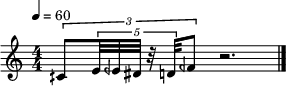

In [2]:
v = Chain([
    Note("4C+!", dur=F(1, 3)),

    Note("4E",  dur=F(1, 3)*F(1, 5)),
    Note("4E-", dur=F(1, 3)*F(1, 5)),
    Note("4Eb", dur=F(1, 3)*F(1, 5)),
    Rest(dur=F(1, 3)*F(1, 5)),
    Note("4D",  dur=F(1, 3)*F(1, 5)),
    Note("4F-", dur=F(1, 3)),
])
v.show()

## Ferneyhough's Third String Quartet, violin 1

To test the quantizer, we can enter the beginning of the violin I part of Brian Ferneyhough's Third String Quartet

![](assets/ferney1-orig.jpg)

If not explicitely commanded to do so the quantizer is not able to find irregular tuplets (tuplets where the denominator is not a power of two) as the best rhythmical representation for most passages. In this case the `5:3` tuplet in measure 1 is represented as a *64th* `5:4` tuplet, which is mathematically accurate. The rest of the rhythms are recognized correctly, even when dealing with unusual time signatures like *11/6*

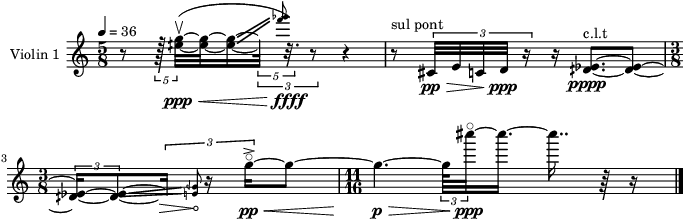

In [4]:
resetImageCache()

struct = ScoreStruct(
    title="Third String Quartet",
    score=r'''
    5/8, 36
    .
    3/8
    11/16
    5/8
    4/8
    .
''')

conf = getConfig()
conf['quant.debug'] = False
conf['quant.complexity'] = 'high'
conf['quant.debugShowNumRows'] = 20

setScoreStruct(struct)


v1 = [
    Rest(F(3,8)),
    Rest(F(3,5)/4),
    # The ! sign after the notename anchors the enharmonic representation to the notename given
    Chord("5G 5E+!", dur=F(3,8)*3/5, tied=True, dynamic='ppp').addSymbol('articulation', 'upbow'),  
    Chord("5G 5E+", dur=F(1, 4)*3/5+F(1,4)*2/3, gliss="6F 6Gb"),
    Rest(1, dynamic='ffff'),
    Rest(1/2, label='sul pont', offset=struct.beat(1, 0)),
    Note("4C#:pp", dur=1/8*F(2, 3)),
    Note("4E", dur=F(2,3)/8),
    Note("4C", dur=F(2,3)/8),
    Note("4D", dur=F(2,3)/8, dynamic='ppp'),
    Chord("4Eb 4D+", offset=struct.beat(1, 1.25), dur=1.25+F(2,3)/4, tied=True,
          dynamic='pppp', label='c.l.t'),
    Chord("4Eb 4D+", dur=F(1,3)+F(2,3)/4, gliss=True),
    Chord('4E 4G-', 0),
    # Simple attributes, like duration, dynamic and simple articulations, can be added
    # to the note as shorthand
    Note("5G~:1/6+1/2:pp:accent", offset=struct.beat(2, F(5,6)), 
         ).addSymbol('harmonic', 'sounding'),
    Note("5G", 1.5 + F(1,16)*F(2,3), dynamic='p').addSpanner(">"), 
    Note("7C#", F(2,3)/8+F(3,8)+F(7,16), dynamic='ppp').addSymbol('harmonic', 'sounding')   
]
V1 = Voice(v1, 'Violin 1')

# Symbols and other notational elements can also be added later
V1[2].addSpanner('<', v1[4]).addSpanner('slur', V1[4])
V1[6].addSpanner('>', v1[9])
V1[11].addSpanner(symbols.Hairpin('>', niente=True), v1[12])
V1[-3].addSpanner('<', V1[-2])

# Within a jupyter notebook any object evaluated as last within a cell
# will show html including rendered notation
V1.show()



It is possible to quantize the part with a lower rhythmic complexity. In this case only the first measure is quantized somewhat differently.

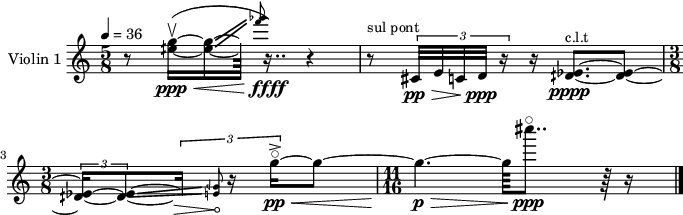

In [5]:
lowres = CoreConfig()
lowres['quant.complexity'] = 'low'
lowres['show.staffSize'] = 13
with lowres:
    V1.show()

## Rhythmic transformations

Any ``MObj`` (a Note, Chord, Chain, Voice, etc) can be subjected to multiple operations. For example, this returns a copy of the original voice time stretched by a factor of 4/3. Notice that the score structure is not modified

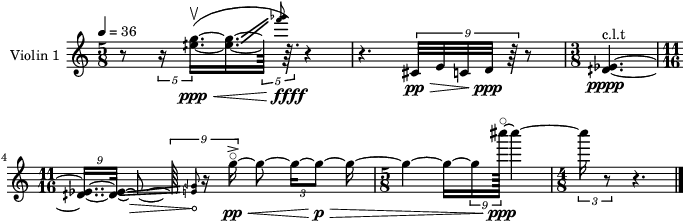

In [6]:
V1.timeScale(F(4,3)).show()

Pitch transformations are also possible. 

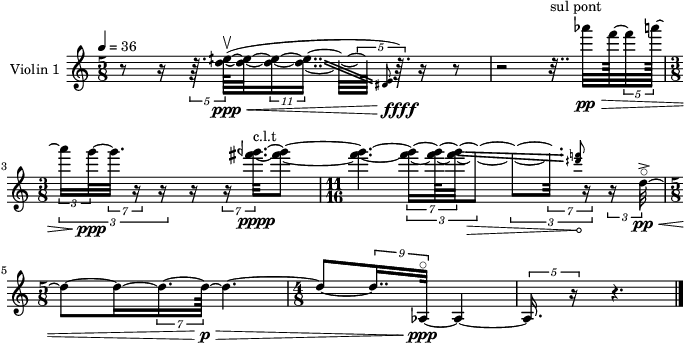

In [12]:
V1.invertPitch("5F-").timeScale(11/7).show()

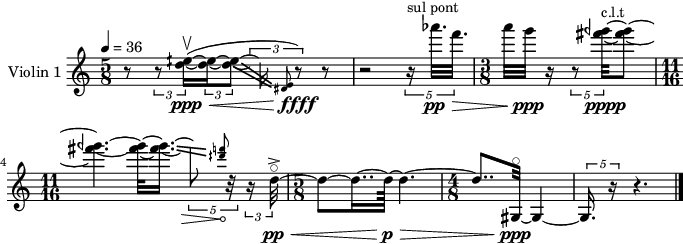

In [13]:
with lowres:
    V1.invertPitch("5F-").timeScale(11/7).show()